https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva?state=published

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from pandas.tseries.offsets import MonthEnd

In [2]:
df_1997 = pd.read_csv('datos/1997.csv')
df_1997.sample()

,Unnamed: 0,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,CIUDAD DE MEXICO,COAHUILA,COLIMA,...,QUINTANA ROO,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS
222,2015-04-30,4,62,16,4,48,63,81,24,7,...,20,13,73,32,17,57,8,39,3,17


In [3]:
df_1997 = df_1997.rename(columns = {'Unnamed: 0' : 'date'})
df_1997.date = pd.to_datetime(df_1997.date)
df_1997.sample()

,date,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,CIUDAD DE MEXICO,COAHUILA,COLIMA,...,QUINTANA ROO,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS
19,1998-05-31,6,24,1,5,180,36,88,11,8,...,5,24,44,52,31,50,3,78,1,27


In [4]:
df_1997 = df_1997.set_index('date')
df_1997.sample()

,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,CIUDAD DE MEXICO,COAHUILA,COLIMA,DURANGO,...,QUINTANA ROO,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS
date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,2,68,5,6,38,62,72,29,31,22,...,12,28,74,29,18,31,8,60,10,18


In [5]:
df_2015 = pd.read_csv('datos/2015.csv')
df_2015.sample()

,Unnamed: 0,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
16,2016-02-29,3.0,71.0,4.0,3.0,34.0,64.0,66.0,15.0,39.0,...,12.0,15.0,83.0,80.0,19.0,40.0,5.0,48.0,9.0,36.0


In [6]:
df_2015 = df_2015.rename(columns = {'Unnamed: 0' : 'date'})
df_2015.date = pd.to_datetime(df_2015.date)
df_2015.sample()

,date,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
3,2015-12-31,2.0,68.0,5.0,6.0,38.0,62.0,68.0,26.0,29.0,...,12.0,28.0,73.0,26.0,18.0,31.0,8.0,56.0,9.0,18.0


In [7]:
df_2015 = df_2015.set_index('date')
df_2015.sample()

,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
date,,,,,,,,,,,,,,,,,,,,,
2018-07-31,4.0,272.0,6.0,6.0,57.0,213.0,120.0,17.0,41.0,17.0,...,95.0,41.0,76.0,78.0,65.0,78.0,12.0,109.0,11.0,48.0


In [8]:
df_final = df_1997.sum(axis = 1).sort_index()
df_final

date
1997-01-31    1410
1997-02-28    1406
1997-03-31    1551
1997-04-30    1371
1997-05-31    1432
              ... 
2017-08-31    2162
2017-09-30    2203
2017-10-31    2394
2017-11-30    2230
2017-12-31    2264
Length: 252, dtype: int64

In [9]:
se_dolosos = pd.concat([df_final, df_2015[df_2015.index.year >= 2018].sum(axis = 1).sort_index()])
se_dolosos

date
1997-01-31    1410.0
1997-02-28    1406.0
1997-03-31    1551.0
1997-04-30    1371.0
1997-05-31    1432.0
               ...  
2022-08-31    2224.0
2022-09-30       0.0
2022-10-31       0.0
2022-11-30       0.0
2022-12-31       0.0
Length: 312, dtype: float64

In [22]:
se_dolosos = se_dolosos[se_dolosos.index.date < pd.Timestamp('2022-09-30')]
se_dolosos

C:\Users\user\AppData\Local\Temp\ipykernel_2656\3691637393.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  se_dolosos = se_dolosos[se_dolosos.index.date < pd.Timestamp('2022-09-30')]


date
1997-01-31    1410.0
1997-02-28    1406.0
1997-03-31    1551.0
1997-04-30    1371.0
1997-05-31    1432.0
               ...  
2022-04-30    2148.0
2022-05-31    2431.0
2022-06-30    2231.0
2022-07-31    2277.0
2022-08-31    2224.0
Length: 308, dtype: float64

In [11]:
presidentes = pd.DataFrame({
  'nombre' : ['Zedillo', 'Fox', 'Calderón', 'Peña Nieto', 'AMLO'],
  'inicio' : ['1997-01-31', '2000-01-01', '2006-01-01', '2012-01-01', '2018-01-01'],
  'medio' : ['1998-06-30', '2003-01-01', '2009-01-01', '2015-01-01', '2020-01-01'],
  'fin' : ['1999-12-31', '2005-12-31', '2011-12-31', '2017-12-31', '2022-08-31'],
  'color' : ['orange', 'royalblue', 'mediumblue', 'green', 'red']
})
presidentes

,nombre,inicio,medio,fin,color
0,Zedillo,1997-01-31,1998-06-30,1999-12-31,orange
1,Fox,2000-01-01,2003-01-01,2005-12-31,royalblue
2,Calderón,2006-01-01,2009-01-01,2011-12-31,mediumblue
3,Peña Nieto,2012-01-01,2015-01-01,2017-12-31,green
4,AMLO,2018-01-01,2020-01-01,2022-08-31,red


In [12]:
presidentes.inicio = pd.to_datetime(presidentes.inicio)
presidentes.medio = pd.to_datetime(presidentes.medio)
presidentes.fin = pd.to_datetime(presidentes.fin)
presidentes

,nombre,inicio,medio,fin,color
0,Zedillo,1997-01-31,1998-06-30,1999-12-31,orange
1,Fox,2000-01-01,2003-01-01,2005-12-31,royalblue
2,Calderón,2006-01-01,2009-01-01,2011-12-31,mediumblue
3,Peña Nieto,2012-01-01,2015-01-01,2017-12-31,green
4,AMLO,2018-01-01,2020-01-01,2022-08-31,red


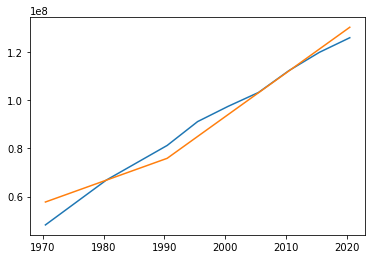

In [13]:
pob_mexico = pd.DataFrame({
  'date' : ['1970-06-15', '1980-06-15', '1990-06-15', '1995-06-15', '2000-06-15', '2005-06-15', '2010-06-15', '2015-06-15', '2020-06-15'],
  'value' : [48225238, 66846833, 81249645, 91158290, 97483412, 103263388, 112336538, 119938473, 126014024]
})
pob_mexico.date = pd.to_datetime(pob_mexico.date)
x = np.arange(len(pob_mexico))
fit = np.polyfit(x, pob_mexico.value.values, 1)
fit_pob_fn = np.poly1d(fit)

plt.figure()
plt.plot(pob_mexico.date, pob_mexico.value)
plt.plot(pob_mexico.date, fit_pob_fn(x))
plt.show()

In [14]:
df_dolosos = pd.DataFrame(se_dolosos, columns = ['value'])
df_dolosos

,value
date,
1997-01-31,1410.0
1997-02-28,1406.0
1997-03-31,1551.0
1997-04-30,1371.0
1997-05-31,1432.0
...,...
2022-04-30,2148.0
2022-05-31,2431.0
2022-06-30,2231.0


In [15]:
df_dolosos['normalized'] = 0.0
df_dolosos['normalized'] = pd.to_numeric(df_dolosos['normalized'])

In [16]:
for i, r in df_dolosos.iterrows():
  df_dolosos.loc[i, 'normalized'] = df_dolosos.loc[i].value / fit_pob_fn(df_dolosos.loc[i].name.year) * 100000
df_dolosos.head(15)

,value,normalized
date,,
1997-01-31,1410.0,0.007753
1997-02-28,1406.0,0.007731
1997-03-31,1551.0,0.008528
1997-04-30,1371.0,0.007538
1997-05-31,1432.0,0.007874
1997-06-30,1400.0,0.007698
1997-07-31,1274.0,0.007005
1997-08-31,1325.0,0.007285
1997-09-30,1329.0,0.007307


- [x] Comparar con ésta: https://www.youtube.com/watch?v=XUomJkUS7wA?t=140

In [26]:
df_dolosos.index[0]

Timestamp('1997-01-31 00:00:00')

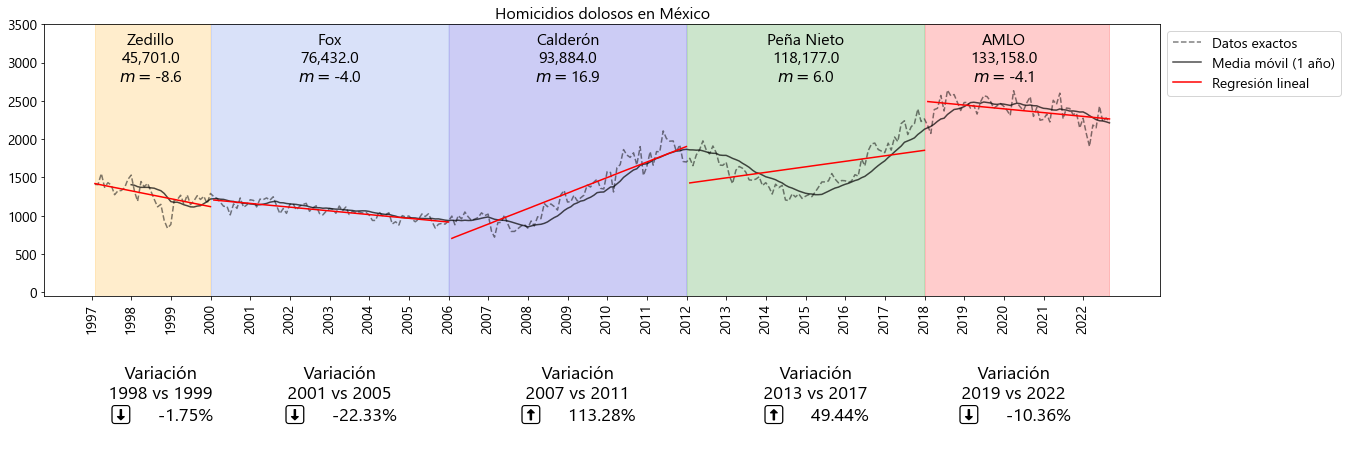

In [28]:
plt.rc('font', family='Segoe UI Emoji')
myFmt = mdates.DateFormatter('%Y')
# https://stackoverflow.com/a/66771077
xticks = pd.date_range(df_dolosos.index[0], df_dolosos.index[-1] + pd.DateOffset(years = 1), freq='Y').strftime("%Y")

plt.figure(figsize = (20, 5))
ax = plt.gca()
ax.xaxis.set_major_formatter(myFmt)
plt.title('Homicidios dolosos en México', fontsize = 16)
plt.plot(df_dolosos.value, 'k--', alpha = 0.5, label = 'Datos exactos')
plt.plot(df_dolosos.value.rolling(12).mean(), c='black', alpha = 0.7, label = 'Media móvil (1 año)')
plt.xticks(xticks, rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(-50, 3500)

for p in presidentes.iterrows():
  plt.axvspan(p[1].inicio, p[1].fin, alpha=0.2, color=p[1].color)
  x = np.arange(len(df_dolosos[p[1].inicio : p[1].fin]))
  fit = np.polyfit(x, df_dolosos[p[1].inicio : p[1].fin].value.values, 1)
  fit_fn = np.poly1d(fit)
  plt.plot(df_dolosos[p[1].inicio : p[1].fin].index, fit_fn(x), c='red')
  
  muertos = df_dolosos[p[1].inicio : p[1].fin].value.sum(axis = 0)

  text = (
    p[1].nombre + '\n' +
    str("{:,}".format(muertos)) + '\n' +
    '$m=$' + str(round(fit_fn.c[0], 1))
  )
  plt.annotate(
    text, # El valor de pendiente
    (p[1].medio, 3400), #  - pd.DateOffset(years=2)
    fontsize= 16,
    weight='bold',
    ha='center',
    va = 'top')

  variacion = df_dolosos.loc[p[1].fin].value * 100 / df_dolosos.loc[p[1].inicio + pd.DateOffset(years=1) + MonthEnd(0)].value
  variacion = variacion - 100
  variacion = round(variacion, 2)
  up_down = '⬆️' if variacion > 0 else '⬇️'
  variacion = str(variacion)
  text = '''
    Variación
    {} vs {}
    {}{}%
  '''.format((p[1].inicio + pd.DateOffset(years=1) + MonthEnd(0)).year, p[1].fin.year, up_down, variacion)

  plt.annotate(
    text, # El valor de pendiente
    (p[1].medio, -700),
    fontsize= 18,
    weight='bold',
    ha='center',
    va = 'top',
    annotation_clip=False)

plt.plot([],[], label = 'Regresión lineal', c='r')
plt.legend(bbox_to_anchor=(1, 1), prop={'size': 14})

plt.savefig('imgs/dolosos.png', bbox_inches = 'tight')
plt.show()

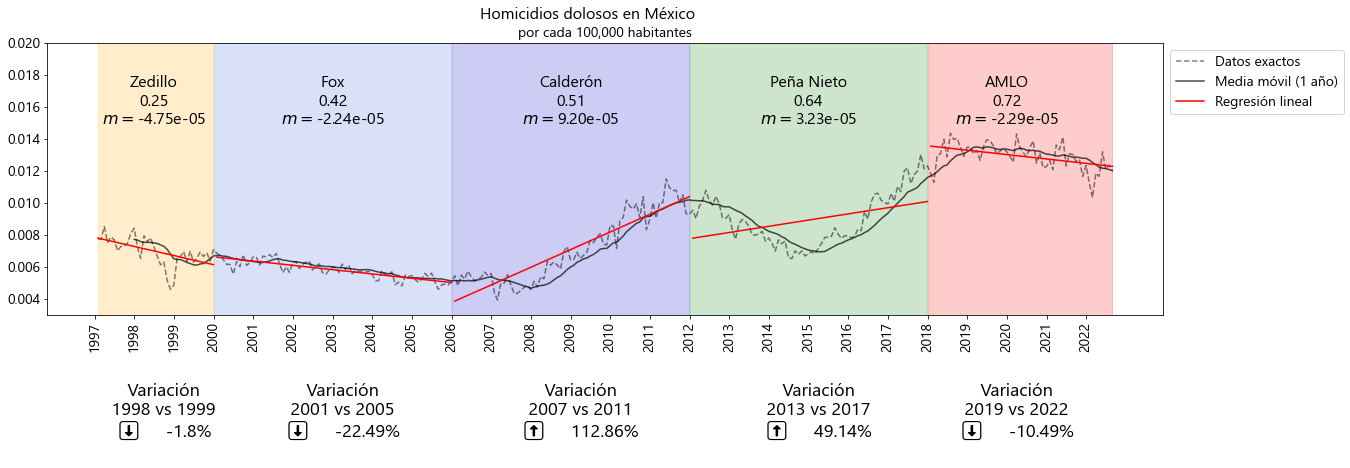

In [46]:
plt.rc('font', family='Segoe UI Emoji')
myFmt = mdates.DateFormatter('%Y')

plt.figure(figsize = (20, 5))
ax = plt.gca()
ax.xaxis.set_major_formatter(myFmt)
plt.suptitle('Homicidios dolosos en México', fontsize = 16)
plt.title('por cada 100,000 habitantes', fontsize = 14)
plt.plot(df_dolosos.normalized, 'k--', alpha = 0.5, label = 'Datos exactos')
plt.plot(df_dolosos.normalized.rolling(12).mean(), c='black', alpha = 0.7, label = 'Media móvil (1 año)')
plt.xticks(xticks, rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0.003, 0.020)

for p in presidentes.iterrows():
  plt.axvspan(p[1].inicio, p[1].fin, alpha=0.2, color=p[1].color)
  x = np.arange(len(df_dolosos[p[1].inicio : p[1].fin]))
  fit = np.polyfit(x, df_dolosos[p[1].inicio : p[1].fin].normalized.values, 1)
  fit_fn = np.poly1d(fit)
  plt.plot(df_dolosos[p[1].inicio : p[1].fin].index, fit_fn(x), c='red')
  
  muertos = df_dolosos[p[1].inicio : p[1].fin].normalized.sum(axis = 0)

  text = (
    p[1].nombre + '\n' +
    str("{:,}".format(round(muertos, 2))) + '\n' +
    # https://stackoverflow.com/a/23941602
    '$m=$' + "%0.*e"%(2, fit_fn.c[0]) 
  )
  plt.annotate(
    text, # El valor de pendiente
    (p[1].medio, 0.018), #  - pd.DateOffset(years=2)
    fontsize= 16,
    weight='bold',
    ha='center',
    va = 'top')

  variacion = df_dolosos.loc[p[1].fin].normalized * 100 / df_dolosos.loc[p[1].inicio + pd.DateOffset(years=1) + MonthEnd(0)].normalized
  variacion = variacion - 100
  variacion = round(variacion, 2)
  up_down = '⬆️' if variacion > 0 else '⬇️'
  variacion = str(variacion)
  text = '''
    Variación
    {} vs {}
    {}{}%
  '''.format((p[1].inicio + pd.DateOffset(years=1) + MonthEnd(0)).year, p[1].fin.year, up_down, variacion)

  plt.annotate(
    text, # El valor de pendiente
    (p[1].medio, 0.00), #  - pd.DateOffset(years=2)
    fontsize= 18,
    weight='bold',
    ha='center',
    va = 'top',
    annotation_clip=False)

plt.plot([],[], label = 'Regresión lineal', c='r')
plt.legend(bbox_to_anchor=(1, 1), prop={'size': 14})

plt.savefig('imgs/dolosos_norm.png', bbox_inches = 'tight')
plt.show()